In [4]:
class OscarsGrindStrategy:
    def __init__(self, initial_bet, win_probability, num_bets, budget):
        self.initial_bet = initial_bet
        self.win_probability = win_probability
        self.num_bets = num_bets
        self.budget = budget

    def simulate_betting_strategy(self, return_history=False, return_stats=False):
        bet_amount = self.initial_bet
        balance = self.budget
        wins = 0
        losses = 0
        balance_history = []
        target = bet_amount

        for _ in range(self.num_bets):
            if balance <= 0:
                break

            won_bet = random.random() < self.win_probability

            if won_bet:
                bet_amount = min(bet_amount, balance)
                balance += bet_amount
                target -= bet_amount
                wins += 1

                if target <= 0:
                    bet_amount = self.initial_bet
                    target = bet_amount
                else:
                    bet_amount += self.initial_bet
            else:
                bet_amount = min(bet_amount, balance)
                balance -= bet_amount
                losses += 1
                target += bet_amount

            balance_history.append(balance)

        result = (balance,)
        if return_history:
            result += (balance_history,)
        if return_stats:
            result += (wins, losses)

        return result if len(result) > 1 else result[0]


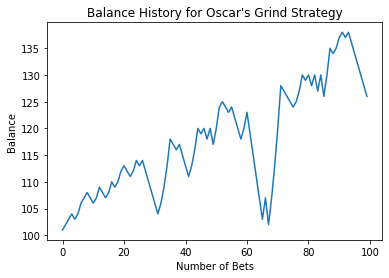

Oscar's Grind strategy has won 51 times and lost 49 times in 100 bets.
Final balance: 126


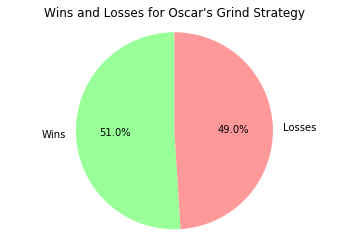

In [29]:
initial_bet = 1
win_probability = 0.5
num_bets = 100
budget = 100

betting_strategy = OscarsGrindStrategy(initial_bet, win_probability, num_bets, budget)

final_balance, balance_history, wins, losses = betting_strategy.simulate_betting_strategy(return_history=True, return_stats=True)
plt.plot(balance_history)
plt.xlabel('Number of Bets')
plt.ylabel('Balance')
plt.title('Balance History for Oscar\'s Grind Strategy')
plt.show()

print(f"Oscar's Grind strategy has won {wins} times and lost {losses} times in {num_bets} bets.")
print(f"Final balance: {final_balance}")

labels = ['Wins', 'Losses']
sizes = [wins, losses]
colors = ['#99ff99', '#ff9999']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Wins and Losses for Oscar's Grind Strategy")
plt.show()
